In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re
%matplotlib inline

In [4]:
smile_on = pd.read_csv('data/SmileOn11.28.2020.csv', encoding = "ISO-8859-1", skiprows=2, low_memory=False)

In [5]:
smile_on.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes


In [6]:
so_1 = smile_on[['CallReportNum', 'ReportVersion', 'CallerNum', 'CityName', 'CountyName', 'PostalCode', 'EnteredOn', 'Birth Year', 'SMILE ON 60+ Screening - Last Screening Date', 'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)', 'SMILE ON 60+ Site Information - Enroller ID', 'SMILE ON 60+ Site Information - Enroller Location', 'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?', 'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?', 'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)', 'SMILE ON 60+ Verification of Eligibility - Transportation Arranged', 'SMILE ON 60+ Verification of Eligibility - Verification of Eligibility']]

In [7]:
#so_1 = so_1.loc[so_1['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'].isin(['Yes'])]

In [8]:
so_1.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,SMILE ON 60+ Screening - Last Screening Date,SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply),SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,1957,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,1943,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,1957,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Provider Site,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,3231923,Memphis,Shelby,38104.0,11/25/2020 14:17,1953,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,-1,NaN,NaN,NaN,11/25/2020 13:58,1953,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,NaN,Yes,No,NaN,Yes


In [9]:
so_1.columns=['CallReportNum', 'ReportVersion', 'CallerNum', 'CityName', 'CountyName',
       'PostalCode', 'EnteredOn', 'Birth Year',
       'Screening - Last Screening Date',
       'Oral Care Encounter - What care was provided to the enrollee?',
       'Site Information - Enroller ID',
       'Site Information - Enroller Location',
       'Treatment Plan - Is the treatment plan completed?',
       'Treatment Plan - Was a treatment plan developed?',
       'Treatment Plan - Was the enrollee able to be restored to function',
       'Verification of Eligibility Transportation Arranged',
       'Verification of Eligibility']

In [10]:
so_1.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,1957,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,1943,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,1957,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Provider Site,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,3231923,Memphis,Shelby,38104.0,11/25/2020 14:17,1953,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,-1,NaN,NaN,NaN,11/25/2020 13:58,1953,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,NaN,Yes,No,NaN,Yes


In [11]:
so_1_clinics = so_1[so_1['Treatment Plan - Was the enrollee able to be restored to function'].isnull()]

In [12]:
so_1_clinics.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,1957,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,1943,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,3231923,Memphis,Shelby,38104.0,11/25/2020 14:17,1953,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN
5,81371535,SMILE ON 60+ Clinical,3605119,Kingsport,Sullivan,37664.0,11/25/2020 13:04,1960,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,Provider Site,No,Yes,NaN,NaN,NaN
6,81371527,SMILE ON 60+ Clinical,3859184,Lebanon,Wilson,37087.0,11/25/2020 13:04,1953,NaN,NaN,Neighborhood Health - Lebanon,Provider Site,NaN,NaN,NaN,No,Yes


In [13]:
so_1_clinics['Site Information - Enroller ID'].value_counts()

Interfaith Dental Clinic - Nashville                                                    3575
Interfaith Dental Clinic - Murfreesboro                                                 2292
Church Health Center - Memphis                                                          2259
Christ Community Health Services- Frayser                                                767
Interfaith Health Clinic of Knoxville - Knoxville                                        752
Healing Hands Health Center - Bristol                                                    740
Karis Dental Clinic - Cleveland                                                          730
Friends in Need Health Center - Kingsport                                                727
Neighborhood Health - Cleveland Park/ Nashville                                          713
Matthew Walker Comprehensive Health Center Inc. - Nashville                              685
Keystone Dental Care Inc. - Johnson City                              

In [14]:
so_1['Site Information - Enroller ID'].value_counts()

Interfaith Dental Clinic - Nashville                                                    5802
Interfaith Dental Clinic - Murfreesboro                                                 3706
Church Health Center - Memphis                                                          3581
Matthew Walker Comprehensive Health Center Inc. - Nashville                             2516
Interfaith Health Clinic of Knoxville - Knoxville                                       1822
Karis Dental Clinic - Cleveland                                                         1809
Friends in Need Health Center - Kingsport                                               1566
Healing Hands Health Center - Bristol                                                   1346
Keystone Dental Care Inc. - Johnson City                                                1032
Christ Community Health Services- Hickory Hill                                           986
Christ Community Health Services- Frayser                             

In [15]:
patients_restored = so_1[so_1['Treatment Plan - Was the enrollee able to be restored to function'].isin(['Yes','No'])]

In [16]:
patients_restored.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
2,81377435,SMILE ON 60+ Clinical,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,1957,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Provider Site,Yes,Yes,Yes,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,-1,NaN,NaN,NaN,11/25/2020 13:58,1953,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,NaN,Yes,No,NaN,Yes
13,81360780,SMILE ON 60+ Clinical,3172525,Cleveland,Bradley,37312.0,11/25/2020 9:36,1959,2/7/2020,No Code - Denture step Mandibular: may be used...,Karis Dental Clinic - Cleveland,Provider Site,No,NaN,Yes,NaN,NaN
27,81330190,SMILE ON 60+ Clinical,3856533,Bartlett,Shelby,38134.0,11/24/2020 13:21,1957,11/24/2020,150 - Comprehensive Oral Evaluation -new or es...,Christ Community Health Services- Raleigh,Provider Site,No,Yes,Yes,No,Yes
34,81323497,SMILE ON 60+ Clinical,2835036,Memphis,Shelby,38127.0,11/24/2020 11:22,1958,NaN,5750 - Reline complete maxillary denture - lab...,Christ Community Health Services- Raleigh,Provider Site,Yes,No,Yes,NaN,NaN


In [17]:
patients_restored = patients_restored[(patients_restored['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]

<ipython-input-17-f9d9c43d6e5b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  patients_restored = patients_restored[(patients_restored['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]


In [18]:
patients_restored.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
2,81377435,SMILE ON 60+ Clinical,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,1957,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Provider Site,Yes,Yes,Yes,NaN,NaN
13,81360780,SMILE ON 60+ Clinical,3172525,Cleveland,Bradley,37312.0,11/25/2020 9:36,1959,2/7/2020,No Code - Denture step Mandibular: may be used...,Karis Dental Clinic - Cleveland,Provider Site,No,NaN,Yes,NaN,NaN
27,81330190,SMILE ON 60+ Clinical,3856533,Bartlett,Shelby,38134.0,11/24/2020 13:21,1957,11/24/2020,150 - Comprehensive Oral Evaluation -new or es...,Christ Community Health Services- Raleigh,Provider Site,No,Yes,Yes,No,Yes
34,81323497,SMILE ON 60+ Clinical,2835036,Memphis,Shelby,38127.0,11/24/2020 11:22,1958,NaN,5750 - Reline complete maxillary denture - lab...,Christ Community Health Services- Raleigh,Provider Site,Yes,No,Yes,NaN,NaN
35,81323181,SMILE ON 60+ Clinical,3620854,Cleveland,Bradley,NaN,11/24/2020 11:17,1958,8/10/2020,140 - Limited Oral evaluation - problem focuse...,Karis Dental Clinic - Cleveland,Provider Site,No,NaN,No,NaN,NaN


In [19]:
patients_restored = patients_restored.sort_values(by = 'EnteredOn')

In [20]:
patients_restored = patients_restored.drop_duplicates(['CallerNum'], keep='last')

In [21]:
patients_restored.shape

(4575, 17)

In [22]:
patients_restored['Treatment Plan - Was the enrollee able to be restored to function'].value_counts()

Yes    2489
No     2086
Name: Treatment Plan - Was the enrollee able to be restored to function, dtype: int64

In [23]:
2489/(2489+2086)

0.5440437158469945

In [24]:
2086/(2489+2086)

0.4559562841530055

In [25]:
patients_restored_yes = patients_restored[patients_restored['Treatment Plan - Was the enrollee able to be restored to function']=='Yes']

In [26]:
patients_restored_yes.shape

(2489, 17)

In [27]:
patients_restored_no = patients_restored[patients_restored['Treatment Plan - Was the enrollee able to be restored to function']=='No']

In [28]:
patients_restored_no.shape

(2086, 17)

In [29]:
yes = patients_restored_yes['Site Information - Enroller ID'].value_counts().to_frame().reset_index()

In [30]:
no = patients_restored_no['Site Information - Enroller ID'].value_counts().to_frame().reset_index()

In [31]:
combo = pd.merge(yes, no, on = 'index')

In [32]:
combo['total'] = combo['Site Information - Enroller ID_x'] + combo['Site Information - Enroller ID_y']

In [33]:
combo['percentage'] = (combo['Site Information - Enroller ID_x']/combo['total'])*100

In [34]:
combo.columns = ['Location', 'Restored_yes', 'Restored_no', 'Total', 'Percentage']

In [35]:
combo = combo.head()

In [36]:
combo

,Location,Restored_yes,Restored_no,Total,Percentage
0,Church Health Center - Memphis,348,169,517,67.311412
1,Interfaith Dental Clinic - Nashville,346,276,622,55.627010
2,Interfaith Dental Clinic - Murfreesboro,233,195,428,54.439252
3,Healing Hands Health Center - Bristol,188,54,242,77.685950
4,Friends in Need Health Center - Kingsport,171,36,207,82.608696


In [37]:
# success rate by percentage - restore to function. out of all the patients how many presedures were successful - help with effectiveness

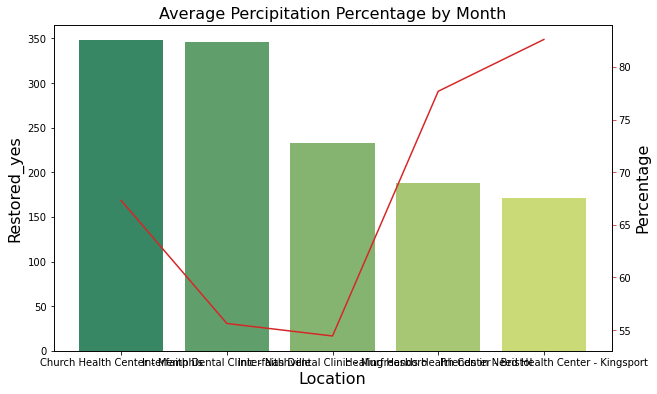

In [38]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Average Percipitation Percentage by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16)
ax1 = sns.barplot(x='Location', y='Restored_yes', data = combo, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Avg Percipitation %', fontsize=16)
ax2 = sns.lineplot(x='Location', y='Percentage', data = combo, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [57]:
list = []
for index, row in combo.iterrows():
    list.append(re.sub(' - ', '\n', row['Location']))

In [58]:
combo['new'] = list

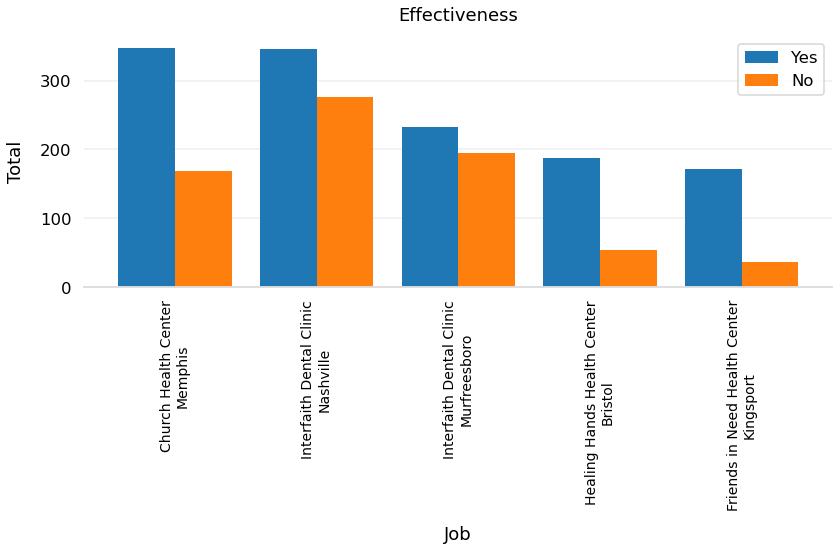

In [59]:
# Use Seaborn's context settings to make fonts larger.
import seaborn as sns
sns.set_context('talk')

# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(12, 8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
x = np.arange(len(combo.new.unique()))

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(x,combo['Restored_yes'],
            width=bar_width, label='Yes')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width,combo['Restored_no'],
            width=bar_width, label='No')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(combo.new.unique())
plt.xticks(rotation=90, fontsize = 14)


# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Job', labelpad=15)
ax.set_ylabel('Total', labelpad=15)
ax.set_title('Effectiveness', pad=15)

fig.tight_layout()

In [164]:
so_1.head(10)

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,1957,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,1943,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,1957,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Provider Site,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,3231923,Memphis,Shelby,38104.0,11/25/2020 14:17,1953,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,-1,NaN,NaN,NaN,11/25/2020 13:58,1953,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,NaN,Yes,No,NaN,Yes
5,81371535,SMILE ON 60+ Clinical,3605119,Kingsport,Sullivan,37664.0,11/25/2020 13:04,1960,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,Provider Site,No,Yes,NaN,NaN,NaN
6,81371527,SMILE ON 60+ Clinical,3859184,Lebanon,Wilson,37087.0,11/25/2020 13:04,1953,NaN,NaN,Neighborhood Health - Lebanon,Provider Site,NaN,NaN,NaN,No,Yes
7,81371481,SMILE ON 60+ Clinical,3746643,Church Hill,Hawkins,37642.0,11/25/2020 13:03,1956,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,Provider Site,No,Yes,NaN,NaN,NaN
8,81371365,SMILE ON 60+ Registration,3859184,Lebanon,Wilson,37087.0,11/25/2020 13:03,4725,NaN,NaN,Neighborhood Health - Lebanon,Provider Site,NaN,NaN,NaN,NaN,NaN
9,81367388,SMILE ON 60+ Clinical,3858402,Memphis,Shelby,38128.0,11/25/2020 11:56,1955,11/24/2020,140 - Limited Oral evaluation - problem focuse...,Christ Community Health Services- Raleigh,Provider Site,Yes,No,NaN,No,Yes


In [165]:
treatment_plan = so_1.loc[so_1['Treatment Plan - Is the treatment plan completed?'] == 'Yes']

In [166]:
so_1.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,1957,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,1943,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,1957,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Provider Site,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,3231923,Memphis,Shelby,38104.0,11/25/2020 14:17,1953,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,-1,NaN,NaN,NaN,11/25/2020 13:58,1953,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,NaN,Yes,No,NaN,Yes


In [167]:
so_1['Treatment Plan - Was a treatment plan developed?'].value_counts()

Yes    15930
No      1098
Name: Treatment Plan - Was a treatment plan developed?, dtype: int64

In [168]:
treatment_plan = treatment_plan.sort_values(by = 'EnteredOn')

In [169]:
treatment_plan_patients = treatment_plan.drop_duplicates(['CallerNum'], keep='last')

In [172]:
treatment_plan_patients = treatment_plan_patients[(so_1['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]


<ipython-input-172-a38b646c69fe>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  treatment_plan_patients = treatment_plan_patients[(so_1['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]


In [173]:
treatment_plan_patients.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
35116,59364969,SMILE ON 60+ Clinical,2511788,Lewisburg,Marshall,37091.0,1/10/2019 12:45,1937,1/8/2019,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,Yes,Yes,Yes,No,Yes
35186,59355822,SMILE ON 60+ Clinical,2440677,Cleveland,Bradley,37323.0,1/10/2019 7:39,1951,NaN,No Code - Denture step Mandibular: may be used...,Karis Dental Clinic - Cleveland,Provider Site,Yes,NaN,Yes,NaN,NaN
15232,69808733,SMILE ON 60+ Clinical,2795490,Memphis,Shelby,38109.0,1/10/2020 13:49,1939,7/8/2019,120 - Periodic Oral Evaluation - 15; 1110 - Pr...,Christ Community Health Services- Third Street,Provider Site,Yes,Yes,Yes,No,Yes
15227,69808893,SMILE ON 60+ Clinical,2956206,Memphis,Shelby,38106.0,1/10/2020 13:53,1956,10/16/2019,2391 - Posterior one surface resin - 15,Christ Community Health Services- Third Street,Provider Site,Yes,Yes,Yes,No,Yes
15108,69809420,SMILE ON 60+ Clinical,2793058,Memphis,Shelby,38109.0,1/10/2020 14:07,1922,NaN,120 - Periodic Oral Evaluation - 15; 210 - Int...,Christ Community Health Services- Third Street,Provider Site,Yes,Yes,Yes,No,Yes


In [174]:
treatment_plan_patients.shape

(2987, 17)

In [176]:
treatment_plan_patients_restored = treatment_plan_patients[treatment_plan_patients['Treatment Plan - Was the enrollee able to be restored to function'] == 'Yes']

In [177]:
treatment_plan_patients_restored.shape

(2653, 17)

In [175]:
treatment_plan_patients['Site Information - Enroller ID'].value_counts()

Church Health Center - Memphis                                                          385
Interfaith Dental Clinic - Nashville                                                    370
Interfaith Dental Clinic - Murfreesboro                                                 251
Healing Hands Health Center - Bristol                                                   224
Interfaith Health Clinic of Knoxville - Knoxville                                       216
Keystone Dental Care Inc. - Johnson City                                                194
Friends in Need Health Center - Kingsport                                               193
Matthew Walker Comprehensive Health Center Inc. - Nashville                             189
Karis Dental Clinic - Cleveland                                                         180
Christ Community Health Services- Hickory Hill                                          101
Appalachian Miles for Smiles - Mobile                                           

In [8]:
so_1.info

<bound method DataFrame.info of        CallReportNum              ReportVersion  CallerNum     CityName  \
0           81381827  SMILE ON 60+ Registration    3859874  Springfield   
1           81379177  SMILE ON 60+ Registration    3859755    Nashville   
2           81377435      SMILE ON 60+ Clinical    2518680  Rogersville   
3           81375215      SMILE ON 60+ Clinical    3231923      Memphis   
4           81373934      SMILE ON 60+ Clinical         -1          NaN   
...              ...                        ...        ...          ...   
40027       53192452  SMILE ON 60+ Registration         -1          NaN   
40028       67915561  SMILE ON 60+ Registration    3239813      Memphis   
40029       67251405      SMILE ON 60+ Clinical    2631417    Kingsport   
40030       63063150      SMILE ON 60+ Clinical         -1          NaN   
40031       70839903      SMILE ON 60+ Clinical         -1          NaN   

      CountyName  PostalCode         EnteredOn Birth Year  \
0     

In [9]:
so_1['ReportVersion'].value_counts()

SMILE ON 60+ Clinical        27432
SMILE ON 60+ Registration    12600
Name: ReportVersion, dtype: int64

In [10]:
so_1['CityName'].value_counts()

Nashville        6456
Memphis          6304
Murfreesboro     2435
Cleveland        1718
Knoxville        1461
                 ... 
Lakeland            1
Huron               1
Finger              1
Olive Branch        1
Pleasant Hill       1
Name: CityName, Length: 387, dtype: int64

In [11]:
type(so_1)

pandas.core.frame.DataFrame

In [12]:
so_1.isnull().sum()

CallReportNum                                                                                                                                                                  0
ReportVersion                                                                                                                                                                  0
CallerNum                                                                                                                                                                      0
CityName                                                                                                                                                                     628
CountyName                                                                                                                                                                   347
PostalCode                                                                                                         

In [13]:
so_1['CallerNum'].value_counts()

-1          70
 2441776    36
 2431132    31
 2416076    29
 2466994    28
            ..
 3825101     1
 3743280     1
 2653820     1
 3686036     1
 3821558     1
Name: CallerNum, Length: 8708, dtype: int64

In [14]:
so_1 = so_1[(so_1['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]

In [15]:
so_1['CallerNum'].value_counts()

2441776    36
2431132    31
2416076    29
2860770    28
2466994    28
           ..
2536760     1
2510267     1
3200276     1
2450144     1
2496365     1
Name: CallerNum, Length: 8706, dtype: int64

In [16]:
so_1['Birth Year'].value_counts()

1958    3546
1956    3528
1957    3399
1955    3285
1954    2643
        ... 
1983       1
2054       1
4725       1
1975       1
1985       1
Name: Birth Year, Length: 75, dtype: int64

In [17]:
so_1.head(15)

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,SMILE ON 60+ Screening - Last Screening Date,SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply),SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,1957,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,1943,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,1957,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Provider Site,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,3231923,Memphis,Shelby,38104.0,11/25/2020 14:17,1953,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN
5,81371535,SMILE ON 60+ Clinical,3605119,Kingsport,Sullivan,37664.0,11/25/2020 13:04,1960,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,Provider Site,No,Yes,NaN,NaN,NaN
6,81371527,SMILE ON 60+ Clinical,3859184,Lebanon,Wilson,37087.0,11/25/2020 13:04,1953,NaN,NaN,Neighborhood Health - Lebanon,Provider Site,NaN,NaN,NaN,No,Yes
7,81371481,SMILE ON 60+ Clinical,3746643,Church Hill,Hawkins,37642.0,11/25/2020 13:03,1956,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,Provider Site,No,Yes,NaN,NaN,NaN
8,81371365,SMILE ON 60+ Registration,3859184,Lebanon,Wilson,37087.0,11/25/2020 13:03,4725,NaN,NaN,Neighborhood Health - Lebanon,Provider Site,NaN,NaN,NaN,NaN,NaN
9,81367388,SMILE ON 60+ Clinical,3858402,Memphis,Shelby,38128.0,11/25/2020 11:56,1955,11/24/2020,140 - Limited Oral evaluation - problem focuse...,Christ Community Health Services- Raleigh,Provider Site,Yes,No,NaN,No,Yes
10,81366697,SMILE ON 60+ Registration,3550392,Lebanon,Wilson,37087.0,11/25/2020 11:35,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
so_1['SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)'].value_counts()

No Code - Denture step Mandibular: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20; No Code - Denture step Maxillary: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20                                                                           3925
7140 - Extraction - erupted tooth or exposed root - 15                                                                                                                                                                                                                                                                                                        1710
No Code - Denture step Maxillary: may be used for impressions try-in or delivery visits during fabrication up to 3 uses per denture - 20                                                                                                                                                          

In [19]:
so_1['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts()

No     8123
Yes    6149
Name: SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), dtype: int64

In [20]:
# No = 56.91%
# Yes = 43.08%

In [21]:
so_1['SMILE ON 60+ Verification of Eligibility - Verification of Eligibility'].value_counts()

Yes    8651
No       64
Name: SMILE ON 60+ Verification of Eligibility - Verification of Eligibility, dtype: int64

In [22]:
# Yes = 99.26%
# No = 00.73%

In [23]:
so_1_transportation = so_1.loc[so_1['SMILE ON 60+ Verification of Eligibility - Transportation Arranged'].isin(['Yes','No'])]

In [24]:
so_1['CityName'].value_counts()

Nashville        6449
Memphis          6304
Murfreesboro     2435
Cleveland        1718
Knoxville        1461
                 ... 
Lakeland            1
Huron               1
Finger              1
Olive Branch        1
Pleasant Hill       1
Name: CityName, Length: 387, dtype: int64

In [25]:
so_1_transportation['SMILE ON 60+ Verification of Eligibility - Transportation Arranged'].value_counts()

No     5483
Yes     340
Name: SMILE ON 60+ Verification of Eligibility - Transportation Arranged, dtype: int64

In [26]:
data_dict = pd.read_excel('data/Data_Dictionary.xlsx')

In [27]:
data_dict.head()

,CallReportNum,unique ID number for each call report form submission
0,ReportVersion,"There are two report versions, Registration or..."
1,LinkedToCallReportNum,This was intended to link call reports.
2,CallDateAndTimeStart,NaN
3,CallDateAndTimeEnd,NaN
4,CallLength,NaN


In [28]:
#prov_out = pd.read_csv('data/Provider_Outpatient_Hospital_Charge_Data_by_APC__CY2017.csv')

In [29]:
#prov_out.head()

In [30]:
#prov_out = prov_out.loc[prov_out['Provider_State'] == 'TN']

In [31]:
#prov_out.head()

In [32]:
#prov_out.info()

In [33]:
#prov_out.shape

In [34]:
#prov_out.APC_Desc.value_counts()

In [35]:
#prov_out.Provider_Name.value_counts()

In [36]:
#bill = pd.read_csv('data/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2017.csv', low_memory=False)

In [37]:
#bill['State Code of the Provider'].value_counts()

In [38]:
#bill.head()

In [39]:
#bill = bill.loc[bill['State Code of the Provider'] == 'TN']

In [40]:
#bill['City of the Provider'].value_counts()

In [41]:
#bill.head()

In [42]:
#bill.columns

In [43]:
#bill['HCPCS Description'].value_counts()

In [44]:
#bill.shape

In [45]:
#bill.head(10)

In [46]:
#apc = pd.read_excel('data/2020_October_Web_Addendum_A.10212020.xlsx')

In [47]:
#apc.head()

In [48]:
#hcpcs = pd.read_excel('data/2020_October_Web_Addendum_B.10212020.xlsx')

In [49]:
#hcpcs.head()

In [90]:
city_info = pd.read_csv('data/500_Cities__Local_Data_for_Better_Health__2019_release.csv')

In [91]:
city_info.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,IL,Illinois,Chicago,Census Tract,BRFSS,Health Outcomes,1714000-17031612000,All teeth lost among adults aged >=65 Years,%,...,39.9,NaN,NaN,"1,545","(41.7978467034, -87.6525358919)",HLTHOUT,TEETHLOST,1714000.0,1.703161e+10,Teeth Loss
1,2016,IL,Illinois,Chicago,Census Tract,BRFSS,Prevention,1714000-17031660700,Visits to dentist or dental clinic among adult...,%,...,46.3,NaN,NaN,"2,366","(41.7738453587, -87.6810954614)",PREVENT,DENTAL,1714000.0,1.703166e+10,Dental Visit
2,2017,IL,Illinois,Decatur,Census Tract,BRFSS,Health Outcomes,1718823-17115001100,Current asthma among adults aged >=18 Years,%,...,10.5,NaN,NaN,"3,485","(39.8496654386, -88.9073271617)",HLTHOUT,CASTHMA,1718823.0,1.711500e+10,Current Asthma
3,2016,IL,Illinois,Joliet,Census Tract,BRFSS,Health Outcomes,1738570-17197881603,All teeth lost among adults aged >=65 Years,%,...,27.4,NaN,NaN,"3,301","(41.5405415324, -88.133133385)",HLTHOUT,TEETHLOST,1738570.0,1.719788e+10,Teeth Loss
4,2017,IL,Illinois,Elgin,Census Tract,BRFSS,Health Outcomes,1723074-17031804405,High cholesterol among adults aged >=18 Years ...,%,...,26.3,NaN,NaN,"3,632","(42.0349418585, -88.2462502287)",HLTHOUT,HIGHCHOL,1723074.0,1.703180e+10,High Cholesterol


In [92]:
city_info.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

In [93]:
city_teeth = city_info[['StateAbbr', 'CityName', 'GeographicLevel', 'Data_Value_Type', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'PopulationCount']]

In [94]:
city_teeth.head()

,StateAbbr,CityName,GeographicLevel,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount
0,IL,Chicago,Census Tract,Crude prevalence,31.6,24.5,39.9,"1,545"
1,IL,Chicago,Census Tract,Crude prevalence,41.9,37.9,46.3,"2,366"
2,IL,Decatur,Census Tract,Crude prevalence,10.0,9.5,10.5,"3,485"
3,IL,Joliet,Census Tract,Crude prevalence,21.0,15.6,27.4,"3,301"
4,IL,Elgin,Census Tract,Crude prevalence,25.7,25.0,26.3,"3,632"


In [97]:
city_teeth_tn = city_teeth.loc[city_teeth['StateAbbr']=='TN']

In [99]:
city_teeth_tn.head()

,StateAbbr,CityName,GeographicLevel,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount
295216,TN,Nashville,Census Tract,Crude prevalence,4.6,4.2,4.9,"5,588"
412622,TN,Chattanooga,City,Crude prevalence,79.8,79.3,80.2,"167,674"
412623,TN,Chattanooga,City,Crude prevalence,4.1,4.0,4.2,"167,674"
412627,TN,Knoxville,Census Tract,Crude prevalence,15.3,14.7,16.0,"3,215"
412628,TN,Knoxville,City,Crude prevalence,10.7,10.5,10.8,"178,874"


In [70]:
city_info['Measure'].value_counts()

Visits to doctor for routine checkup within the past Year among adults aged >=18 Years                                                                                                            29006
Arthritis among adults aged >=18 Years                                                                                                                                                            29006
Cancer (excluding skin cancer) among adults aged >=18 Years                                                                                                                                       29006
High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years                                                                                                          29006
Mental health not good for >=14 days among adults aged >=18 Years                                                                                                                                 29006


In [63]:
city_info.Measure.value_counts()

Visits to doctor for routine checkup within the past Year among adults aged >=18 Years                                                                                                            29006
Arthritis among adults aged >=18 Years                                                                                                                                                            29006
Cancer (excluding skin cancer) among adults aged >=18 Years                                                                                                                                       29006
High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years                                                                                                          29006
Mental health not good for >=14 days among adults aged >=18 Years                                                                                                                                 29006
